In [1]:
#Biblioteca utilizadas 
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb


from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import svm

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

/home/felipe/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('BrVoa.csv' ,encoding = 'latin1')


In [3]:
df.head()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig,Atraso
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,...,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713,0
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,...,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473,0
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,...,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473,0
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,...,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473,0
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,...,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473,0


In [4]:
df.drop(['Voos', 'Chegada.Real', 'Cidade.Origem', 'Estado.Origem','Pais.Origem','Cidade.Destino', 'Estado.Destino','Pais.Destino', 'LongDest' , 'LatDest' , 'LongOrig', 'LatOrig'],axis=1,inplace=True)

In [5]:
df.head()

,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Aeroporto.Destino,Atraso
0,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,Salgado Filho,0
1,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,Miami,0
2,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,Miami,0
3,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,Miami,0
4,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,Miami,0


In [6]:
df['Partida.Prevista'] = pd.to_datetime(df['Partida.Prevista'])
df['Partida.Real'] = pd.to_datetime(df['Partida.Real'])
df['Chegada.Prevista'] = pd.to_datetime(df['Chegada.Prevista']) 


#df['Partida.Prevista'] = pd.to_numeric(df['Partida.Prevista'], )
#df['Partida.Real'] = pd.to_numeric(df['Partida.Real'])

In [7]:
#Dia = df['Partida.Prevista'].apply(lambda x: x.day)
Mes = df['Partida.Prevista'].apply(lambda x: x.month)
#Anos = df['Partida.Prevista'].apply(lambda x: x.year)

#df.insert(1,'Dia',Dia)
df.insert(1,'Mes',Mes)
#df.insert(3,'Anos',Anos)

In [8]:
df.head()

,Companhia.Aerea,Mes,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Aeroporto.Destino,Atraso
0,AMERICAN AIRLINES INC,1,Internacional,2016-01-30 08:58:00,2016-01-30 08:58:00,2016-01-30 10:35:00,Realizado,NaN,Afonso Pena,Salgado Filho,0
1,AMERICAN AIRLINES INC,1,Internacional,2016-01-13 12:13:00,2016-01-13 12:13:00,2016-01-13 21:30:00,Realizado,NaN,Salgado Filho,Miami,0
2,AMERICAN AIRLINES INC,1,Internacional,2016-01-29 12:13:00,2016-01-29 12:13:00,2016-01-29 21:30:00,Realizado,NaN,Salgado Filho,Miami,0
3,AMERICAN AIRLINES INC,1,Internacional,2016-01-19 12:13:00,2016-01-18 12:03:00,2016-01-19 21:30:00,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,Miami,0
4,AMERICAN AIRLINES INC,1,Internacional,2016-01-30 12:13:00,2016-01-30 12:13:00,2016-01-30 21:30:00,Realizado,NaN,Salgado Filho,Miami,0


In [9]:
df['Atraso'] = np.where((df['Partida.Prevista'] >= df['Partida.Real']) ,0, 1)    

In [10]:
df['Partida.Prevista'] = df['Partida.Prevista'].apply(lambda x: x.hour)
df['Chegada.Prevista'] = df['Chegada.Prevista'].apply(lambda x: x.hour)

In [11]:
df.head(10)

,Companhia.Aerea,Mes,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Aeroporto.Destino,Atraso
0,AMERICAN AIRLINES INC,1,Internacional,8,2016-01-30 08:58:00,10,Realizado,NaN,Afonso Pena,Salgado Filho,0
1,AMERICAN AIRLINES INC,1,Internacional,12,2016-01-13 12:13:00,21,Realizado,NaN,Salgado Filho,Miami,0
2,AMERICAN AIRLINES INC,1,Internacional,12,2016-01-29 12:13:00,21,Realizado,NaN,Salgado Filho,Miami,0
3,AMERICAN AIRLINES INC,1,Internacional,12,2016-01-18 12:03:00,21,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,Miami,0
4,AMERICAN AIRLINES INC,1,Internacional,12,2016-01-30 12:13:00,21,Realizado,NaN,Salgado Filho,Miami,0
5,AMERICAN AIRLINES INC,1,Internacional,23,2016-01-03 23:05:00,7,Realizado,NaN,Miami,Afonso Pena,0
6,AMERICAN AIRLINES INC,1,Internacional,23,2016-01-05 23:35:00,7,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Miami,Afonso Pena,1
7,AMERICAN AIRLINES INC,1,Internacional,12,2016-01-18 13:09:00,21,Realizado,CONEXAO DE AERONAVE,Salgado Filho,Miami,1
8,AMERICAN AIRLINES INC,1,Internacional,23,2016-01-22 23:05:00,7,Realizado,NaN,Miami,Afonso Pena,0
9,AMERICAN AIRLINES INC,1,Internacional,23,2016-01-15 23:55:00,7,Realizado,ATRASOS NAO ESPECIFICOS - OUTROS,Miami,Afonso Pena,1


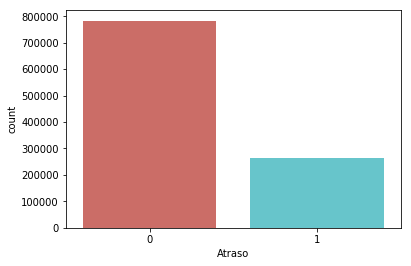

In [12]:
sb.countplot(x='Atraso',data=df, palette='hls')

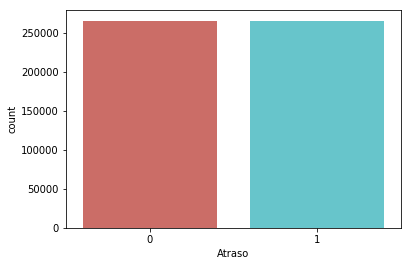

In [13]:
remove_n = (df[df['Atraso'] == 0].shape[0] - df[df['Atraso'] == 1].shape[0])
drop_indices = np.random.choice(df[df['Atraso'] == 0].index, remove_n, replace=False)
df = df.drop(drop_indices)
sb.countplot(x='Atraso',data=df, palette='hls')

In [14]:
Aerea = pd.get_dummies(df['Companhia.Aerea'])
Aerea.head()

,AEROLINEAS ARGENTINAS,AIR CANADA,AIR CHINA,AIR EUROPA S/A,AIR FRANCE,AIRES - LAN COLOMBIA,ALITALIA,AMERICAN AIRLINES INC,AUSTRAL LINEAS AREAS CIELOS DEL SUR S.A,AVIANCA,...,SURINAM AIRWAYS,SWISSAIR,TAAG LINHAS AEREAS DE ANGOLA,TAM,TAM TRANSP. AR. DEL. MERCOS,TAP AIR PORTUGAL,TOTAL,TRASAMERICA AIRLINES-TACAPERU,TURKISH AIRLINES INC.,UNITED AIRLINES
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Linhas = pd.get_dummies(df['Codigo.Tipo.Linha'])
Linhas.head()

,Internacional,Nacional,Regional
1,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0


In [16]:
C_Prevista = pd.get_dummies(df['Chegada.Prevista'])
C_Prevista.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
M = pd.get_dummies(df['Mes'])
M.head()

,1,2,3,4,5,6,7,8,9,10,11,12
1,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0


A = pd.get_dummies(df['Anos'])
A.head()

Just = pd.get_dummies(df['Codigo.Justificativa'])
Just.head()

In [18]:
Previ = pd.get_dummies(df['Partida.Prevista'])
Previ.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
Origem = pd.get_dummies(df['Aeroporto.Origem'])
Origem.head()

,Ab Dhabi International,Adalberto Mendes Da Silva,Aeroporto De Jaguaruna,Aeroporto Internacional Do Rio De Janeiro/Galeao,Aeroporto Internacional Lome-Tokoin,Aeroporto Regional Plinio Alarcon,Afonso Pena,Altamira,Amsterdam,Araguaina,...,Usiminas,Val De Cans,Valenca,Viracopos,Viru Viru,Vitoria Da Conquista,Washington/Dulles Intl,Zandery,Zumbi Dos Palmares,Zurique
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Destino = pd.get_dummies(df['Aeroporto.Destino'])
Destino.head()

,Ab Dhabi International,Adalberto Mendes Da Silva,Aeroporto De Jaguaruna,Aeroporto Internacional Do Rio De Janeiro/Galeao,Aeroporto Internacional Lome-Tokoin,Aeroporto Regional Plinio Alarcon,Afonso Pena,Altamira,Amsterdam,Araguaina,...,Usiminas,Val De Cans,Valenca,Viracopos,Viru Viru,Vitoria Da Conquista,Washington/Dulles Intl,Zandery,Zumbi Dos Palmares,Zurique
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.head()

,Companhia.Aerea,Mes,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Aeroporto.Destino,Atraso
1,AMERICAN AIRLINES INC,1,Internacional,12,2016-01-13 12:13:00,21,Realizado,NaN,Salgado Filho,Miami,0
5,AMERICAN AIRLINES INC,1,Internacional,23,2016-01-03 23:05:00,7,Realizado,NaN,Miami,Afonso Pena,0
6,AMERICAN AIRLINES INC,1,Internacional,23,2016-01-05 23:35:00,7,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Miami,Afonso Pena,1
7,AMERICAN AIRLINES INC,1,Internacional,12,2016-01-18 13:09:00,21,Realizado,CONEXAO DE AERONAVE,Salgado Filho,Miami,1
8,AMERICAN AIRLINES INC,1,Internacional,23,2016-01-22 23:05:00,7,Realizado,NaN,Miami,Afonso Pena,0


In [22]:
df.drop(['Companhia.Aerea','Mes','Codigo.Tipo.Linha','Partida.Prevista', 'Partida.Real', 'Chegada.Prevista', 'Situacao.Voo', 'Codigo.Justificativa', 'Aeroporto.Origem','Aeroporto.Destino'],axis=1,inplace=True)

In [23]:
df.head()

,Atraso
1,0
5,0
6,1
7,1
8,0


In [24]:
df_dmy = pd.concat([df,C_Prevista,Mes,Previ,Aerea,Linhas,Origem,Destino],axis=1)


In [25]:
df_dmy.head()

,Atraso,0,1,2,3,4,5,6,7,8,...,Usiminas,Val De Cans,Valenca,Viracopos,Viru Viru,Vitoria Da Conquista,Washington/Dulles Intl,Zandery,Zumbi Dos Palmares,Zurique
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X = df_dmy.drop(['Atraso'],axis=1).values
y = df_dmy.loc[:,'Atraso']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

In [ ]:
Classif_Tree = tree.DecisionTreeClassifier()
Classif_Tree.fit(X_train, y_train)
y_pred = Classif_Tree.predict(X_train)

print(classification_report(y_train, y_pred))


clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predn=clf.predict(X_test)
print('accuracy', metrics.accuracy_score(predn,y_test))


In [ ]:
Classif_RL = LogisticRegression()
Classif_RL.fit(X_train, y_train)
y_pred = Classif_RL.predict(X_train)

print(classification_report(y_train, y_pred))

clf = LogisticRegression()
clf.fit(X_train, y_train)
predn=clf.predict(X_test)
print('accuracy', metrics.accuracy_score(predn,y_test))